In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 27 15:00:59 2017

@author: Administrator
"""
import time
import sklearn 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import math
import pylab as pl
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
os.getcwd()
#font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

'C:\\Users\\wwx559045.CHINA\\Course\\ML_and_AI\\09_code'

In [8]:
#1.1 读取数据
# os.chdir("E:\\Work\\聚类_华为")
#如果中文文件不识别，可更改为英文名，或者用open函数 
# data_path = r'天级KPI_干扰_话务量.csv' 
df = pd.read_csv('kpi.csv',encoding='utf8')

In [11]:
#1.2 数据检查
#检查数据维度、前/后几行
df.head()

,date,station,throut_tot,noise_avg
0,2015/1/28,L5GED8,5.3947,-116.8958
1,2015/1/28,L5GED5,5.1684,-107.6458
2,2015/1/28,L5GED7,10.5770,-117.2604
3,2015/1/28,L5GE2B,0.0307,-118.8750
4,2015/1/28,L5GEA7,0.0561,-118.3854


In [12]:
df.columns
# type(df)
# df.shape 
# df.head()
# df.tail()
# df.describe()
# df.isnull().any()#该数据集没有缺失值
#df.shape()
#生成一个groupby对象，实际上还未进行任何计算，可对其调用方法进行计算
#grouped=df['MR.LteScRSRP',' MR.LteScRSRQ'].groupby(df['objectId'])
#grouped
#df_mean=grouped.mean()
#df_mean.head()
#df_mean=df.groupby(by=['objectId']).agg({'MR.LteScRSRP':'mean','MR.LteScRSRQ':'mean'})


Index(['date', 'station', 'throut_tot', 'noise_avg'], dtype='object')

In [14]:
#1.3数据汇总及检查
df.columns=['date','station','throut_tot','noise_avg']
df_mean=df.groupby(by=['station']).agg({'throut_tot':'mean','noise_avg':'mean'}).reset_index()
df_mean.head()
# df_mean.shape
# max(df_mean["noise_avg"])
# min(df_mean["noise_avg"])
# sorted(df_mean["noise_avg"])
# sorted(df_mean["throut_tot"])

,station,throut_tot,noise_avg
0,L57169,6.437147,-110.919803
1,L57251,2.275780,-113.328477
2,L57252,3.766103,-113.486807
3,L57253,6.564697,-113.609737
4,L57257,3.948630,-112.007310


Text(0,0.5,'noise_avg')

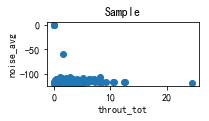

In [15]:
#画图
ax=plt.subplot(3,2,1)
plt.title(u'Sample')
plt.scatter(df_mean["throut_tot"],df_mean["noise_avg"] )
ax.set_xlabel('throut_tot')
ax.set_ylabel('noise_avg')

Text(0,0.5,'noise_avg')

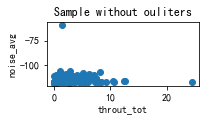

In [16]:
#删除异常值所在的行
indexs= list(df_mean[df_mean['noise_avg'].isin([0])].index)
df_mean2 = df_mean.drop(indexs)

ax=plt.subplot(3,2,1)
plt.title(u'Sample without ouliters')
plt.scatter(df_mean2["throut_tot"],df_mean2["noise_avg"] )
ax.set_xlabel('throut_tot')
ax.set_ylabel('noise_avg')

In [18]:
# plt.scatter(df_mean["throut_tot"],df_mean["noise_avg"] )
# ax.set_xlabel('throut_tot')
# ax.set_ylabel('noise_avg')

In [21]:
#设置数据标准化函数
def MaxMinNormalization(x):  
    x = (x - min(x)) / (max(x) - min(x));  
    return x;
 
#删除字符型变量，用新的数据框保存
df_mean_3=df_mean.drop(['station'],axis=1)
df_norm=df_mean_3.apply(MaxMinNormalization, axis=0) 
df_norm.head()
df_norm.shape #124,2



(124, 2)

Text(0,0.5,'noise_avg')

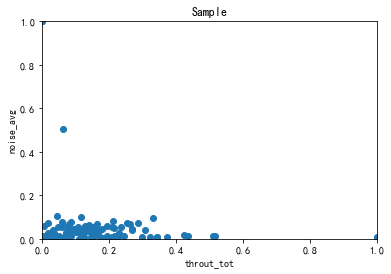

In [22]:
ax = plt.subplot(111) #注意:一般都在ax中设置,不再plot中设置  
clustering_names = [ 'KMeans', 
    'SpectralClustering', 'Ward',
    'DBSCAN', 'Birch','affinity_propagation','average_linkage']

#==============================================================================
# plt.figure(figsize=(len(clustering_names) * 3 + 3, 9.5))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
#                     hspace=.01)
# plt.figure(figsize=(6,8))
# ax=plt.subplot(3,2,1)
# plot_num = 1
throut_tot=df_norm["throut_tot"]
noise_avg=df_norm["noise_avg"]
# #Step3：聚类   样本图
plt.xlim([0,1])
plt.ylim([0,1])
plt.title(u'Sample')
plt.scatter(df_norm["throut_tot"],df_norm["noise_avg"] )
ax.set_xlabel('throut_tot')
ax.set_ylabel('noise_avg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


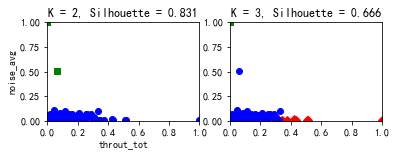

In [23]:
#==============================================================================
#MiniBatchKMeans
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests=[2,3]
ax=plt.subplot(2,2,1)
subplot_counter=0
for t in tests:
    subplot_counter+=1
    plt.subplot(2,2,subplot_counter)
    kmeans_model=cluster.MiniBatchKMeans(n_clusters=t).fit(df_norm)
#     print kmeans_model.labels_:每个点对应的标签值
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(throut_tot[i],noise_avg[i],color=colors[l],
             marker=markers[l],ls='None')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.title(u'K = %s, Silhouette = %.03f' % 
                  (t, metrics.silhouette_score
                   (df_norm, kmeans_model.labels_,metric='euclidean'))
                  )
        ax.set_xlabel('throut_tot')
        ax.set_ylabel('noise_avg')       


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


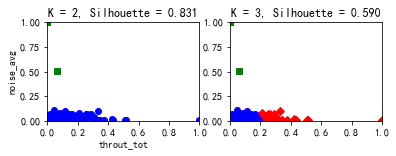

In [24]:
#K-means    
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests=[2,3]
ax=plt.subplot(2,2,1)
subplot_counter=0
for t in tests:
    subplot_counter+=1
    plt.subplot(2,2,subplot_counter)
    kmeans_model=cluster.KMeans(n_clusters=t).fit(df_norm)
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(throut_tot[i],noise_avg[i],color=colors[l],
             marker=markers[l],ls='None')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.title(u'K = %s, Silhouette = %.03f' % 
                  (t, metrics.silhouette_score
                   (df_norm, kmeans_model.labels_,metric='euclidean'))
                  )
        ax.set_xlabel('throut_tot')
        ax.set_ylabel('noise_avg') 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters))


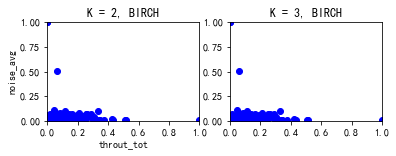

In [25]:
#BIRCH 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
ax=plt.subplot(2,2,1)
tests=[2,3]
subplot_counter=0
for t in tests:
    subplot_counter+=1
    plt.subplot(2,2,subplot_counter)
    Birch=cluster.Birch(n_clusters=t).fit(df_norm)
    for i,l in enumerate(Birch.labels_):
        plt.plot(throut_tot[i],noise_avg[i],color=colors[l],
             marker=markers[l],ls='None')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.title(u'K = %s, BIRCH' % (t))
    ax.set_xlabel('throut_tot')
    ax.set_ylabel('noise_avg') 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


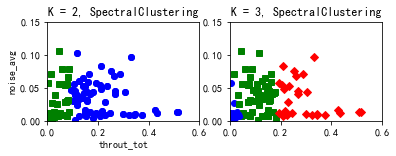

In [26]:
name='DBSCAN'  
ax=plt.subplot(2,2,1)
plt.title(name, size=18)
dbscan = cluster.DBSCAN(eps=.1).fit(df_norm)
#     print kmeans_model.labels_:每个点对应的标签值
for i,l in enumerate(dbscan.labels_):
    plt.plot(throut_tot[i],noise_avg[i],color=colors[l],
             marker=markers[l],ls='None')
    plt.xlim([0,1])
    plt.ylim([0,1])
    ax.set_xlabel('throut_tot')
    ax.set_ylabel('noise_avg') 

#SpectralClustering
ax=plt.subplot(2,2,1)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests=[2,3]
subplot_counter=0
for t in tests:
    subplot_counter+=1
    plt.subplot(2,2,subplot_counter)
    spectral = cluster.SpectralClustering(n_clusters=t,
                                   eigen_solver='arpack',
                                   affinity="nearest_neighbors").fit(df_norm)
    for i,l in enumerate(spectral.labels_):
        plt.plot(throut_tot[i],noise_avg[i],color=colors[l],
                 marker=markers[l],ls='None')
        plt.xlim([0,0.6])
        plt.ylim([0,0.15])
        plt.title(u'K = %s, SpectralClustering' % (t))
    ax.set_xlabel('throut_tot')
    ax.set_ylabel('noise_avg') 
    #ax.legend(spectral.labels_ ,loc='upper left'),

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


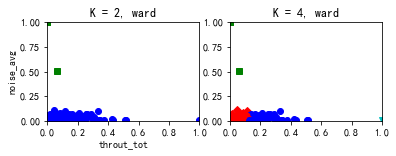

In [27]:
#ward
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(df_norm, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
ax=plt.subplot(2,2,1)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests=[2,4]
subplot_counter=0
for t in tests:
    subplot_counter+=1
    plt.subplot(2,2,subplot_counter)
    ward = cluster.AgglomerativeClustering(n_clusters=t, linkage='ward',
                                           connectivity=connectivity).fit(df_norm)
    for i,l in enumerate(ward.labels_):
        plt.plot(throut_tot[i],noise_avg[i],color=colors[l],
                 marker=markers[l],ls='None')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.title(u'K = %s, ward' % (t))
    ax.set_xlabel('throut_tot')
    ax.set_ylabel('noise_avg') 

In [29]:
# ax.legend(set(spectral.labels_),loc='upper left'),

df_mean["cluster"]=spectral.labels_
df_mean["lable"]="特征"

#对两个分类按图示效果打标签
df_mean["lable"][df_mean["cluster"].isin([0])]="高话务量小区"
df_mean["lable"][df_mean["cluster"].isin([1])]="普通话务量小区"
df_mean["lable"][df_mean["cluster"].isin([2])]="低话务量小区"

df_mean.to_csv('cluster_rst_20180725.txt', sep='\t')
  
 #rst = pd.concat([df_mean_2,spectral.labels_], axis=1)
# estimate bandwidth for mean shift
#bandwidth = cluster.estimate_bandwidth(df_norm, quantile=0.3)
# connectivity matrix for structured Ward

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
